# Project 2: Exploration of numerical methods using a damped oscillatory system

In this project, several numerical algorithms are investigated in simulating a 1D damped oscillatory system. These include the normal Euler method, improved Euler method, verlet method and Euler-Cromer method. The equation of motion is given by $m\dfrac{d^2x}{dt^2} + b\dfrac{dx}{dt} + kx = F(t)$, where $k$ is the spring constant, $m$ is the mass and $b$ is the damping coefficient. $F(t)$ is the external force on the system as a function of time. For the first and second week, the numerical methods are coded and compared by its numerical accuracy. In the third week, several oscillation cases such as sudden push in the oscillation and resonant vibrations are looked into using the best numerical method concluded from the first weeks. Several initiatives were also conducted in this project. 

In [1]:
# importing the necessary modules
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams.update({'font.size': 14})
plt.style.use('default')


## Week 1: setting up numerical methods

We initially start by setting up numerical models for normal damped oscillations. By setting $F(t) = 0$, the differential equation for acceleration is as follows:<br>
$a_i = \dfrac{-k}{m}x_i - \dfrac{b}{m}v_i$<br>
This will be true for all the numerical methods used. The calculation for velocities and position varies depending on the type of method we used. Each method is different, but they all revolve around the idea of getting a close solution by computing thousands of numerical arithmetics in a computer. For time-evolutionary systems such as the one we are investigating, it is crucial to set a fixed time step $h$.

In [2]:
# define initial parameters such as time-step h, damp coefficient b
# The below parameters are used throughout the project unless specified otherwise
initial_x = 3
initial_v = 0
TIME_STEP = 0.1
TIME_MAX = 60
MASS = 3.51
SPRING_K = 1.38
DAMP_COEF = 0.5


The first numerical method is the classic Euler's method, where the solution is found by multiplying the time step with a slope at a given point and tracing out the next point. The differential equations used are as follows:<br>
$v_{i+1} = v_i + a_ih$<br>
$x_{i+1} = x_i + v_ih$<br>
h refers to the time-step that is set and used in our numerical integration. The Euler method is a first order method, so it's truncation error is around the size of $O(h^2)$.


In [3]:
def Euler_method(x_0, v_0, time_step, time_max):
    '''
    generates damped solution using normal Euler's method
    
    Parameters
    ==========
    x_0: float (initial condition of x at t = 0)
    v_0: float (initial condition of v at t = 0)
    time_step: float (time step h)
    time_max: float (time of the oscillation period you want to see)
    
    Return
    ======
    time: np.ndarray (array of time)
    solution: np.ndarray (array of amplitudes)
    velocity: np.ndarray (array of velocities)
    '''
    
    solution = np.array([x_0])
    velocity = np.array([v_0])
    time = np.array([0])
    
    while time[-1] < time_max:
        #formula for acceleration, velocity and position
        a_i = - SPRING_K * solution[-1]/ MASS - DAMP_COEF * velocity[-1] /MASS
        v_i = velocity[-1] + a_i * time_step
        x_i = solution[-1] + velocity[-1] * time_step

        solution = np.append(solution, x_i)
        velocity = np.append(velocity, v_i)
        time = np.append(time, time[-1] + time_step)
    
    else:
        return time, solution, velocity

The second one is the improved Euler's method, which is similiar to the original version except that the position now includes a second order term of the acceleration.<br>
$v_{i+1} = v_i + a_ih$<br>
$x_{i+1} = x_i + v_ih + \dfrac{1}{2}a_ih^2$<br>
This makes it a second-order method where the truncation error size is $O(h^3)$.

In [4]:
def imp_Euler_method(x_0, v_0, time_step, time_max):
    '''
    generates solution by improved Euler's method.
    
    Parameters
    ==========
    x_0: float (initial condition of x at t = 0)
    v_0: float (initial condition of v at t = 0)
    time_step: float (time step h)
    time_max: float (time of the oscillation period you want to see)
    
    Return
    ======
    time: np.ndarray (array of time)
    solution: np.ndarray (array of amplitudes)
    velocity: np.ndarray (array of velocities)
    '''
    # setting up arrays for time, velocity, amplitude(solution)
    solution = np.array([x_0])
    velocity = np.array([v_0])
    time = np.array([0])
    
    while time[-1] < time_max:
        # using formula for acceleration, velocity and position
        a_i = - SPRING_K * solution[-1]/ MASS - DAMP_COEF * velocity[-1]/MASS
        v_i = velocity[-1] + a_i * time_step
        x_i = solution[-1] + velocity[-1] * time_step + a_i * time_step ** 2 / 2
        
        #add new values into the array
        solution = np.append(solution, x_i)
        velocity = np.append(velocity, v_i)
        time = np.append(time, time[-1] + time_step) 
    
    else:
        return time, solution, velocity

The third method looked into is called Verlet's method, a sympletic integrator which is different than the Euler methods. This type of integrator preserves hamiltonian quantities in a system and a central difference approximation is used. The formula is shown below: <br>
$v_i = \dfrac{x_{i+1}-x_{i-1}}{2h}$<br>
$x_{i+1} = 2x_i - x_{i-1} + h^2a_i$<br>
The two equations combined with the one for acceleration can give $x_{i+1} = Ax_i+Bx_{i-1}$<br>
where $A = 2\dfrac{2m-kh^2}{D}$ and $B = \dfrac{bh-2m}{D}$. $D$ is computed as $D = 2m+bh$<br>
Due to the nature of using a centred derivative, it was necessary to start the method by applying another forward numerical method first. In this case, Euler's method was used.


In [5]:
def Verlet_sol(x_0, v_0, time_step, time_max):
    '''
    generates damped solution by using Verlet's method.
    Parameters
    ==========
    x_0: float (initial condition of x at t = 0)
    v_0: float (initial condition of v at t = 0)
    time_step: float (time step h)
    time_max: float (time of the oscillation period you want to see)
    
    Return
    ======
    time: np.ndarray (array of time)
    solution: np.ndarray (array of amplitudes)
    velocity: np.ndarray (array of velocities)
    '''
    
    solution = np.array([x_0])
    velocity = np.array([v_0])
    time = np.array([0])
    # setting the first time point as time-step
    first_time_step = time_step
    D = 2 * MASS + DAMP_COEF * time_step
    A = 2 * (2*MASS - SPRING_K*time_step**2) / D
    B = (DAMP_COEF* time_step - 2*MASS)/ D
    
    while time[-1] < time_max:
        
        # process Euler's method for the first time-point
        if time[-1] < first_time_step:
     
            a_i = - SPRING_K * solution[-1]/ MASS - DAMP_COEF * velocity[-1] /MASS
            v_i = velocity[-1] + a_i * time_step
            x_i = solution[-1] + velocity[-1] * time_step
            velocity = np.append(velocity, v_i)
            solution = np.append(solution, x_i)
            
        # otherwise, carry out verlet integration method for the rest of the time-points
        else:
            x_i = A * solution[-1] + B * solution[-2]      
            solution = np.append(solution, x_i)
            v_i = (solution[-1]-solution[-3])/ (2*time_step)
            velocity = np.append(velocity, v_i)
        
        time = np.append(time, time[-1] + time_step)
    
    else:
        return time, solution, velocity

The final method analysed is the Euler-Cromed method, which is another sympletic integrator that conserves the energy of the motion. Its numerical equations are similiar to the normal Euler method, only difference being it uses $v_{i+1}$ instead of $v_i$. Formula is given below:<br>
$v_{i+1} = v_i + a_ih$<br>
$x_{i+1} = x_i + v_{i+1}h$<br>

In [6]:
def Euler_cromer_sol(x_0, v_0, time_step, time_max, b = DAMP_COEF):
    '''
    generates damped solution by using Euler-Cromer method.
    
    Parameters
    ==========
    x_0: float (initial condition of x at t = 0)
    v_0: float (initial condition of v at t = 0)
    time_step: float (time step h)
    time_max: float (time of the oscillation period you want to see)
    b: damped coefficient
    
    Return
    ======
    time: np.ndarray (array of time)
    solution: np.ndarray (array of amplitudes)
    velocity: np.ndarray (array of velocities)
    '''
    
    solution = np.array([x_0])
    velocity = np.array([v_0])
    time = np.array([0])
    
    # compute the formulas
    while time[-1] < time_max:
        a_i = - SPRING_K * solution[-1]/ MASS - b * velocity[-1] /MASS
        v_i = velocity[-1] + a_i * time_step
        x_i = solution[-1] + v_i * time_step

        solution = np.append(solution, x_i)
        velocity = np.append(velocity, v_i)
        time = np.append(time, time[-1] + time_step) 
    
    else:
        return time, solution, velocity

In order to assess the results of these solutions, it is imperative to use an analytical solution for reference.<br>
The general solution of a damped oscillating system is given by the function:<br>
$x(t) = Ae^{\lambda_1 t} + Be^{\lambda_2 t}$<br>
where A and B are determined by your initial conditions for position and velocity ($x_0$, $v_0$).
Substituting it into the differential equation gives a quadratic equation for root $\lambda$, which $\lambda$ is calculated as follows:<br>
$\lambda = \dfrac{-b}{2m} \pm \dfrac{\sqrt{b^2 - 4mk}}{2m}$<br>
From this, we can have three different cases of damping, which have the associated analytical solutions written.<br>

Case 1: underdamping ($b^2 < 4mk$)


$x(t) = Ae^{\lambda_1 t} + Be^{\lambda_2 t} = Ce^{-\gamma t}cos(\omega t + \phi)$

where $\gamma = \dfrac{b}{2m}$ and $\omega = \sqrt{\omega_{0}^2 - \gamma^2}$ gives you the angular frequency of the system. $\omega_{0} = \dfrac{k}{m}$ and $\phi$ is the phase of the system.

Case 2: Overdamping ($b^2 > 4mk$)

$x(t) = Ae^{\lambda_1 t} + Be^{\lambda_2 t}$ where $\lambda_1$, $\lambda_2$ is given by the root equation.
$x_0 = A+B$ and $v_0 = \lambda_1A + \lambda_2B$. This is similiar for underdamped except its in complex form.

Case 3: Critically damping ($b^2 = 4mk$)

$x(t) = (At + B)e^{-\gamma t}$ where $A = x_0\gamma + v_0$ and $B = x_0$.

In [7]:
# writing the formula for analytical solution
def discriminant(damp_factor, mass, k_factor):
    '''
    computes the discriminant in the oscillatory equation
    
    parameters
    ==========
    damp_factor : float
    mass: float
    k_factor: float
    
    returns
    =======
    discrim: float
    '''
    discrim = damp_factor ** 2 - 4 * mass * k_factor
        
    return discrim

def analytical_damp(x_0, v_0, t):
    discrim = discriminant(DAMP_COEF, MASS, SPRING_K)
    # if discriminant < 0, compute the underdamped solution
    if discrim < 0:        
        root_1 = (- DAMP_COEF + np.sqrt(-discrim) * 1j) / (2 * MASS)
        root_2 = (- DAMP_COEF - np.sqrt(-discrim) * 1j) / (2 * MASS)
        A = (v_0 - root_2 * x_0) / (root_1 - root_2)
        B = x_0 - A
        sol = np.real(A * np.exp(root_1 * t) + B * np.exp(root_2 * t))
        v = np.real(root_1 * A * np.exp(root_1 * t) + root_2 * B * np.exp(root_2 * t))
    
    # compute overdamped solution if discriminant is larger than 0
    elif discrim > 0:
        root_1 = (- DAMP_COEF + np.sqrt(discrim)) / (2 * MASS)
        root_2 = (- DAMP_COEF - np.sqrt(discrim)) / (2 * MASS)
        A = (v_0 - root_2 * x_0) / (root_1 - root_2)
        B = x_0 - A
        sol = A * np.exp(root_1 * t) + B * np.exp(root_2 * t)
        v = root_1 * A * np.exp(root_1 * t) + root_2 * B * np.exp(root_2 * t)
    
    # compute critically damped solution equals to 0
    else:
        gamma = - DAMP_COEF / (2 * MASS)
        A = x_0 * (-gamma) + v_0
        B = x_0
        sol = (A*t+B) * np.exp(gamma*t)
        v = gamma* sol + A * np.exp(gamma*t)
        
    return sol, v
    


In [8]:
# runs the functions to collect each individual numerical solutions
Euler_time, Euler_solution, Euler_v = Euler_method(initial_x, initial_v, TIME_STEP, TIME_MAX)
imp_Euler_time, imp_Euler_solutions, imp_Euler_v = imp_Euler_method(initial_x, initial_v, TIME_STEP, TIME_MAX)
verlet_time, verlet_solution, verlet_v = Verlet_sol(initial_x, initial_v, TIME_STEP, TIME_MAX)
eulcrom_time, Euler_crom_sol, eulcrom_v = Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX)

time = np.arange(0, TIME_MAX + TIME_STEP, TIME_STEP)
a, v = analytical_damp(initial_x, initial_v, time)

The solutions for each method and the analytical solution are plotted in a graph for visualization. From the below graph, we can see how close the numerical solutions is to the analytical solution. Different cases for damping were plotted. 

Underdamped case: $b$ = 0.5, $m$ =  3.51, $k$ = 1.38, $x_0$ = 3, $v_0$ = 0

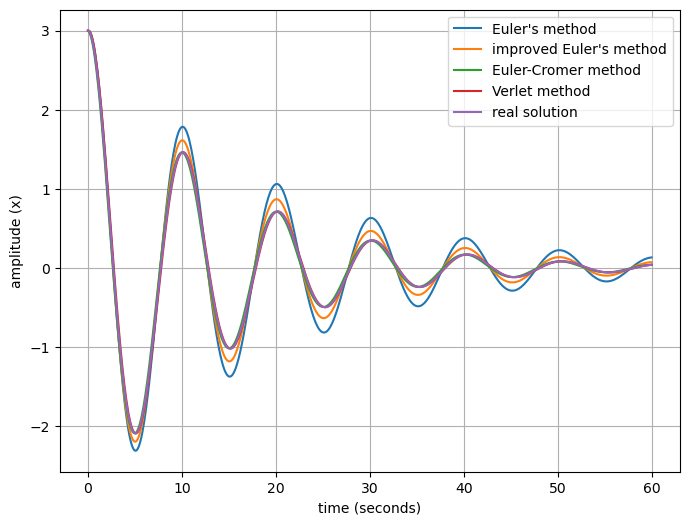

In [9]:
# set the parameters to the above values and run the previous cells again
# before running this cell
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
ax.plot(Euler_time, Euler_solution, label = "Euler's method")
ax.plot(imp_Euler_time, imp_Euler_solutions, label = "improved Euler's method")
ax.plot(eulcrom_time, Euler_crom_sol, label ="Euler-Cromer method")
ax.plot(verlet_time, verlet_solution, label ="Verlet method")
ax.plot(time, a, label ="real solution")
ax.grid()
ax.set_xlabel('time (seconds)')
ax.set_ylabel('amplitude (x)')
ax.legend()
plt.show()

Overdamped case: $b$ = 10, $m$ =  3.51, $k$ = 1.38, $x_0$ = 2, $v_0$ = 1

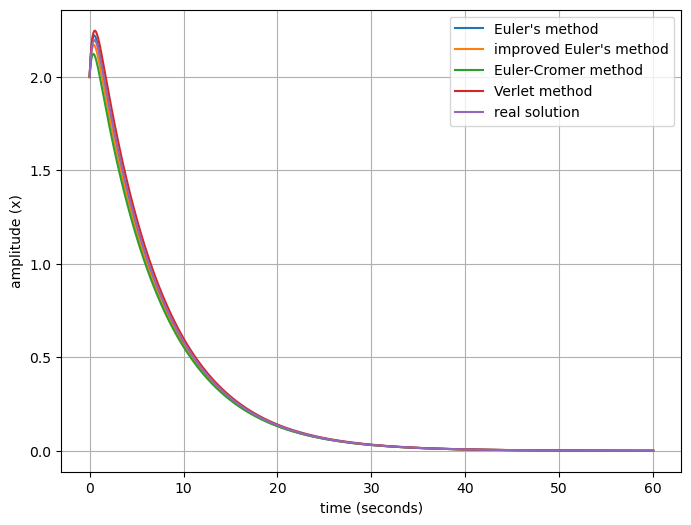

In [63]:
# set the parameters to the above values and run the previous cells again
# before running this cell
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
ax.plot(Euler_time, Euler_solution, label = "Euler's method")
ax.plot(imp_Euler_time, imp_Euler_solutions, label = "improved Euler's method")
ax.plot(eulcrom_time, Euler_crom_sol, label ="Euler-Cromer method")
ax.plot(verlet_time, verlet_solution, label ="Verlet method")
ax.plot(time, a, label ="real solution")
ax.grid()
ax.set_xlabel('time (seconds)')
ax.set_ylabel('amplitude (x)')
ax.legend()
plt.show()

critically damped case: $b$ = $\sqrt{4mk}$, $m$ =  3.51, $k$ = 1.38, $x_0$ = 2, $v_0$ = 1

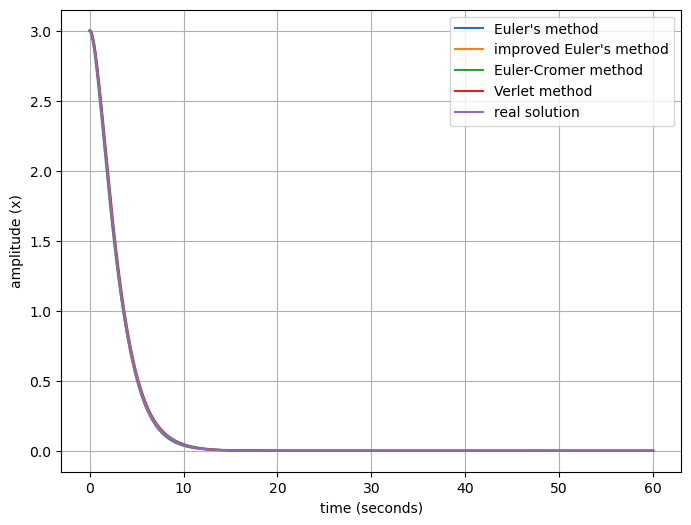

In [47]:
# set the parameters to the above values and run the previous cells again
# before running this cell
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
ax.plot(Euler_time, Euler_solution, label = "Euler's method")
ax.plot(imp_Euler_time, imp_Euler_solutions, label = "improved Euler's method")
ax.plot(eulcrom_time, Euler_crom_sol, label ="Euler-Cromer method")
ax.plot(verlet_time, verlet_solution, label ="Verlet method")
ax.plot(time, a, label ="real solution")
ax.grid()
ax.set_xlabel('time (seconds)')
ax.set_ylabel('amplitude (x)')
ax.legend()
plt.show()


# Week 2 : Error evaluation of the numerical methods


We investigative the effect of the time step $h$ on each method, specifically how the methods deviate away or converge onto the analytical solution as time step is varied. A table of $h$ with different sizes was set up and the results were plotted as we vary them.


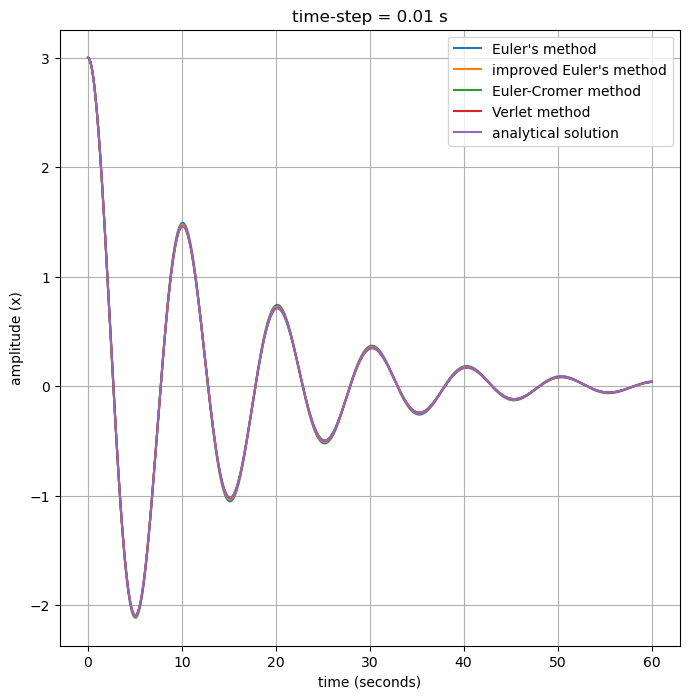

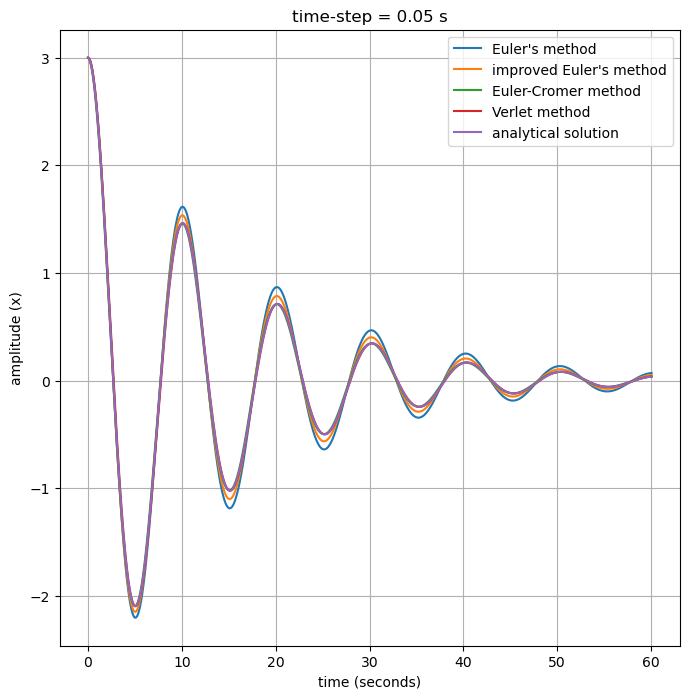

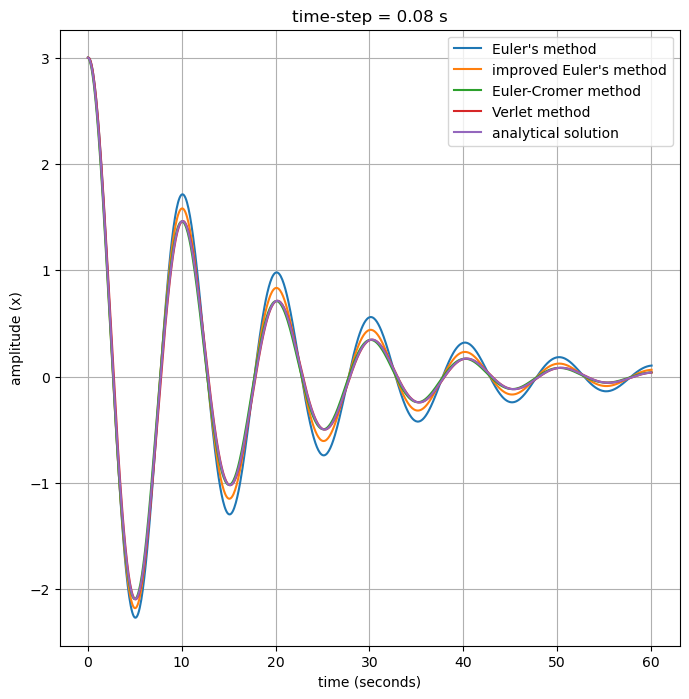

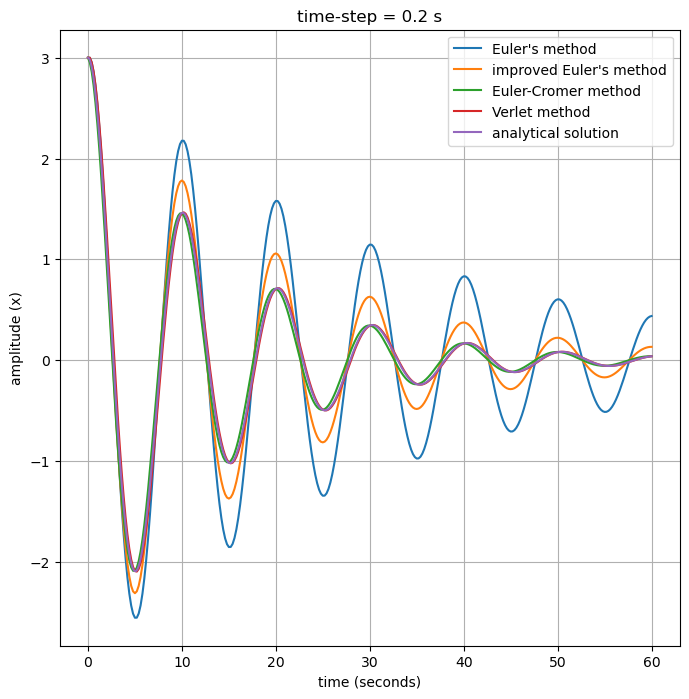

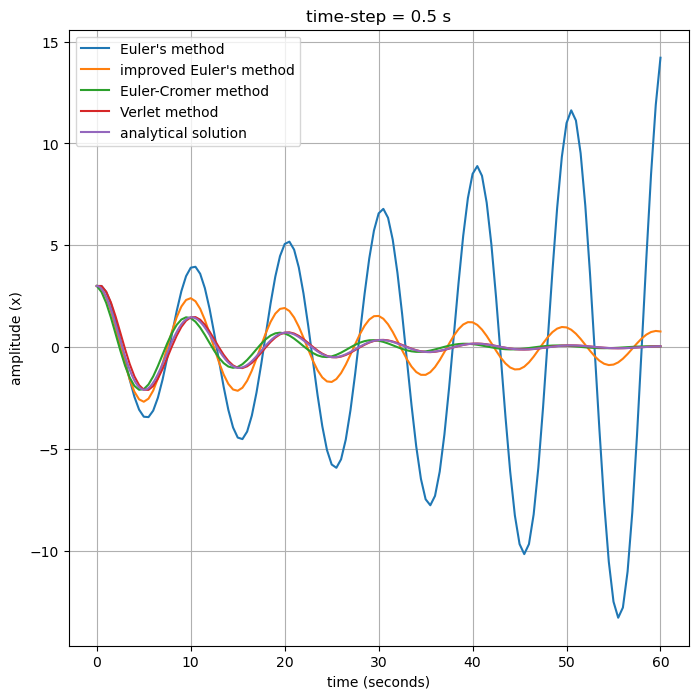

In [10]:
# Before you run this cell, please ensure you run the prior cells that have the conditions set with the underdamped case first!
h = [0.01, 0.05, 0.08, 0.2, 0.5]
# create a for loop to vary h
for time_step in h:
    time2 = np.arange(0, TIME_MAX + time_step, time_step)
    run_time, Euler_solution = Euler_method(initial_x, initial_v, time_step, TIME_MAX)[0:2]
    imp_Euler_solutions = imp_Euler_method(initial_x, initial_v, time_step, TIME_MAX)[1]
    verlet_solution = Verlet_sol(initial_x, initial_v, time_step, TIME_MAX)[1]
    Euler_crom_sol = Euler_cromer_sol(initial_x, initial_v, time_step, TIME_MAX)[1]

    # create plot with time-step written in title
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    ax.plot(run_time, Euler_solution, label = "Euler's method")
    ax.plot(run_time, imp_Euler_solutions, label = "improved Euler's method")
    ax.plot(run_time, Euler_crom_sol, label ="Euler-Cromer method")
    ax.plot(run_time, verlet_solution, label ="Verlet method")
    ax.plot(time, a, label = 'analytical solution')
    ax.grid()
    ax.set_title(f'time-step = {time_step} s')
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('amplitude (x)')
    ax.legend()
    plt.show()


From the above graph, it is clear that the difference between the analytical solution and the numerical methods increases as we increase the time step. This is reasonable since the truncating error for each iteration is dependent on the size of $h$. This indeed confirms our expectations in the computing theory. All methods appear to converge quite well in the time-step of 0.1 s.

As we go to higher time-steps, the Euler methods deviate significantly away from the analytical solution, with normal Euler being the fastest. It is evident that the local truncation errors accumulated is big, making their simulations ineffective. In contrast, the Euler-cromer and Verlet method still appear to align quite well with the analytical solution. From a qualitive standpoint, it appears the latter two methods are more accurate simulations.  

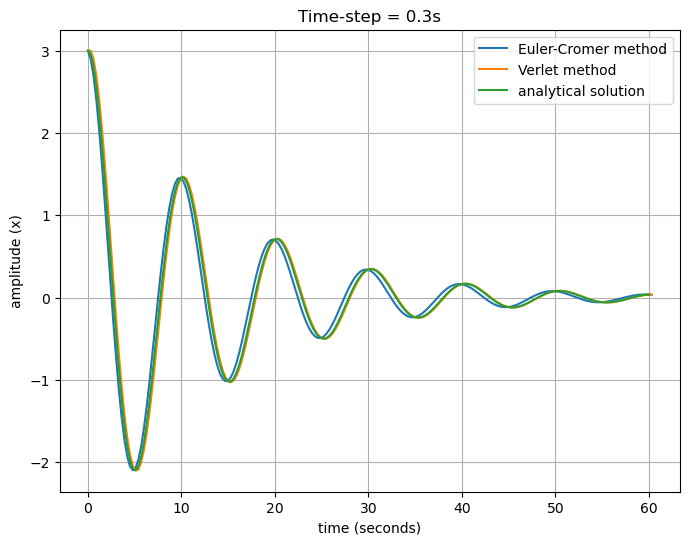

In [11]:
h1 = 0.3


verlet_solution = Verlet_sol(initial_x, initial_v, h1, TIME_MAX)
Euler_crom_sol = Euler_cromer_sol(initial_x, initial_v, h1, TIME_MAX)


fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
ax.plot(Euler_crom_sol[0], Euler_crom_sol[1], label ="Euler-Cromer method")
ax.plot(verlet_solution[0], verlet_solution[1], label ="Verlet method")
ax.plot(time, a, label = 'analytical solution')
ax.grid()
ax.set_title('Time-step = 0.3s')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('amplitude (x)')
ax.legend()
plt.show()



Here we only compare the accuracy of the Euler-cromer method and Verlet method using a time-step of 0.3 s. Based on the graph, the Verlet method fits quite well to the analytical solution while the Euler-Cromer method is slightly off. Both are quite similiar however.

# Quantitative measure of errors against time-step

For a quantitative measure of the accuracy, positional errors and energy errors between the numerical methods and analytical methods at the peaks were used. We note that there is peak in the oscillation at t = 20s, so we use the positional error at that point.

In [12]:
time, Euler_solution= Euler_method(initial_x, initial_v, TIME_STEP, TIME_MAX)[0:2]
imp_Euler_solutions = imp_Euler_method(initial_x, initial_v, TIME_STEP, TIME_MAX)[1]
verlet_solution = Verlet_sol(initial_x, initial_v, TIME_STEP, TIME_MAX)[1]
Euler_crom_sol= Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX)[1]

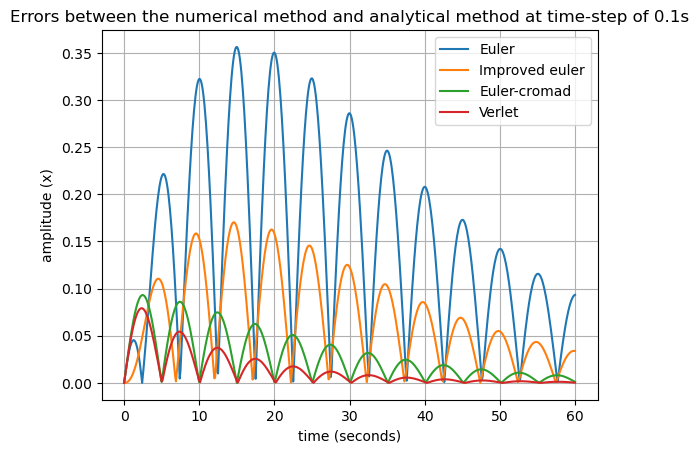

In [13]:
def position_error(analytical, numerical):
    pos_error = np.abs(analytical - numerical)
    return pos_error

euler_error = position_error(a, Euler_solution)
imp_euler_error = position_error(a, imp_Euler_solutions)
verlet_error = position_error(a, verlet_solution)
euler_crom_error = position_error(a, Euler_crom_sol)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, euler_error, label ="Euler")
ax.plot(time, imp_euler_error, label ="Improved euler")
ax.plot(time, euler_crom_error, label ="Euler-cromad")
ax.plot(time, verlet_error, label ="Verlet")
ax.grid()
ax.set_title('Errors between the numerical method and analytical method at time-step of 0.1s')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('amplitude (x)')
ax.legend()
plt.show()

In [14]:
h = np.arange(1e-2, 0.3+1e-2, 1e-2)
error1 = np.array([])
error2 = np.array([])
error3 = np.array([])
error4 = np.array([])

#choose time t = 20s
# ***only works with peak values***
t = 20
ref = analytical_damp(initial_x, initial_v, t)[0]
for i in h:
    euler_point = Euler_method(initial_x, initial_v, i, t)[1][-1]
    imp_eul_point = imp_Euler_method(initial_x, initial_v, i, t)[1][-1]
    verlet_point = Verlet_sol(initial_x, initial_v, i, t)[1][-1]
    eulcro_point = Euler_cromer_sol(initial_x, initial_v, i, t)[1][-1]
    
    euler_error = position_error(ref, euler_point)
    imp_euler_error = position_error(ref, imp_eul_point)
    verlet_error = position_error(ref, verlet_point)
    eulcro_error = position_error(ref, eulcro_point)
    
    error1 = np.append(error1, euler_error)
    error2 = np.append(error2, imp_euler_error)
    error3 = np.append(error3, verlet_error)
    error4 = np.append(error4, eulcro_error)
    

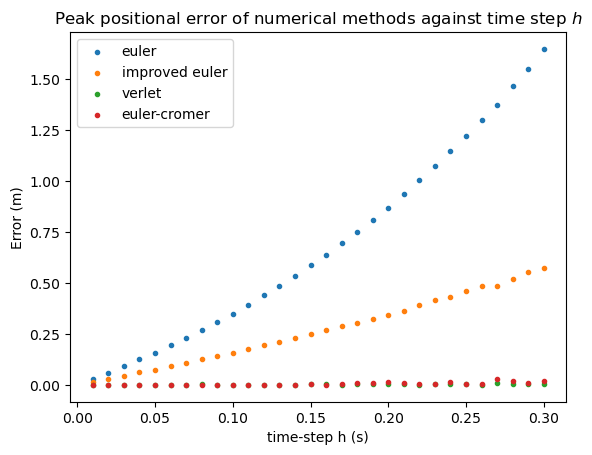

In [15]:
fig = plt.figure()
plt.scatter(h, error1, marker = '.', label = 'euler')
plt.scatter(h, error2, marker = '.', label = 'improved euler')
plt.scatter(h, error3, marker = '.', label = 'verlet')
plt.scatter(h, error4, marker = '.', label = 'euler-cromer')
plt.title(r'Peak positional error of numerical methods against time step $h$')
plt.xlabel('time-step h (s)')
plt.ylabel('Error (m)')
plt.legend()
plt.show()

The graph above shows the change in the position error size at $t$ = 20s as time step h varies from 0.01 to 0.3s. Overall, we can see the growth in error for Euler's method is much significant than the others as it increases drastically. The second fastest method is the improved euler's method. Verlet's method and Euler-Cromer has the least variation in error sizes, making them objectively the most numerically accurate methods. This matches what we see in the previous graphs when we vary step sizes.<br>
<br>
The errors in the position error orginates from the local truncation error of the computation from each iteration, as well as certain rounding errors by the computer when it computes values in the computer. Since the former is proportional to the order of the time-step, this error accumulates everytime as the numerical method goes on. Take Euler's method, its error from one iteration is $O(h^2)$. If we do N iterations where N has an error size of $O(h^{-1})$, its total error would be $O(h)$. As for improved-Euler's method, its local iteration error is $O(h^3)$, which makes its overall error $O(h^2)$. Based on the above graph, the corresponding errors appear to scale with their corresponding order in $h$. At small sizes, $h^2$ grows smaller than $h$ so the improved Euler method's error increases slower than the normal method as expected in this graph.<br>
For the latter time-steps, the growth in errors become exponential, especially for normal Euler. This is probably due to the relatively large size in time-step chosen. After N iterations, the method may output a solution that is completely different than the actual analytical solution. <br>
As for Euler-Cromer and Verlet method, their error sizes are negiglibly small irrespective of the size of $h$. This is due to them being sympletic integrators where they preserve the hamiltonian(energy) of the motion. Therefore, these two methods are clearly better integrators than the Euler methods as indicated from this graph. Verlet method appears to be slightly better than Euler-Cromer as concluded from this graph.

# Analysis in energy

To decide between the latter two, The strength of Euler-Cromer and Verlet is further analysed in terms of energy. The same time-point was picked at t = 20s and energy error was compared over different sizes of $h$. A plot of energy is first shown to give an overall picture of how energy evolves throughout with all numerical methods.

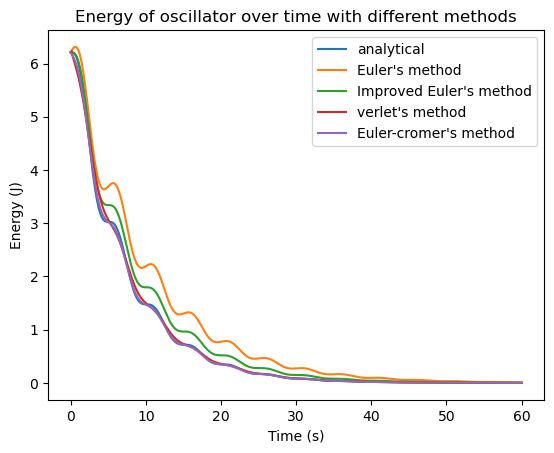

In [16]:
def analytical_energy(a, v):
    '''
    computes the energy of a damped oscillator over time 
    
    Parameters
    ==========
    a: np.ndarray (amplitude of the oscillator)
    v: np.ndarray (velocity of the oscillator)
    
    Returns
    =======
    energy: np.ndarray
    '''
    spring_energy = 0.5 * SPRING_K * (a ** 2)
    speed_energy = 0.5 * MASS * (v ** 2)
    energy = spring_energy + speed_energy
    return energy

def energy_residual(numerical, analytical):
    '''
    computes the error between the energy of numerical solution and analytical solution
    
    Parameters
    ==========
    numerical: np.ndarray/float (numerical value)
    analytical: np.ndarray/float (analytical value)
    '''
    return np.abs(numerical - analytical)


energy = analytical_energy(a, v)
eul_energy= analytical_energy(Euler_solution, Euler_v)
imp_eul_energy = analytical_energy(imp_Euler_solutions, imp_Euler_v)
vel_energy= analytical_energy(verlet_solution, verlet_v)
eulcrom_energy = analytical_energy(Euler_crom_sol, eulcrom_v)


fig = plt.figure()
plt.plot(time, energy, label = 'analytical')
plt.plot(Euler_time, eul_energy, label = "Euler's method")
plt.plot(imp_Euler_time, imp_eul_energy, label = "Improved Euler's method")
plt.plot(verlet_time, vel_energy, label = "verlet's method")
plt.plot(eulcrom_time, eulcrom_energy, label = "Euler-cromer's method")
plt.title('Energy of oscillator over time with different methods')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.show()


Based on the above graph, we can see overall the energy of the pendulum decreases exponentially over time, with a few intermediate points where it stay stationary. This aligns to what we expect for a underdamped oscillator, as the motion diminish over time. Saddle points in the graph correspond to peaks of the oscillation. As a result, the energy temporarily remains unchanged before it goes down again.

In terms of numerical analysis, we can see again that the classic Euler methods don't converge accurately onto the analytical method. Energy errors are inherently big due to the large positional errors as shown previously. The sympletic integrator methods appear to fit quite well. The errors from them were then computed over different $h$.

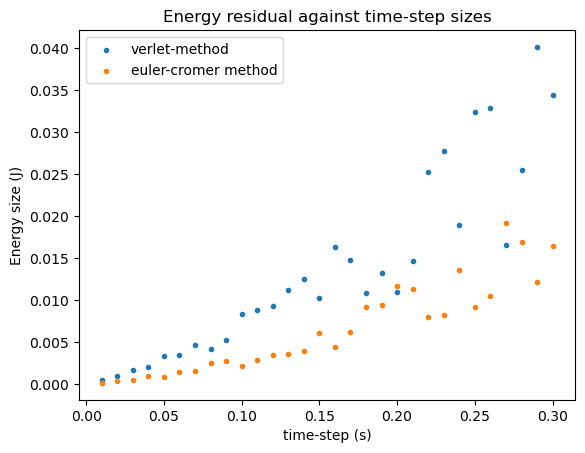

In [17]:
h = np.arange(1e-2, 0.3+1e-2, 1e-2)
E_error1 = np.array([])
E_error2 = np.array([])
E_error3 = np.array([])
E_error4 = np.array([])

t = 20
ref_x, ref_v = analytical_damp(initial_x, initial_v, t)
ref_energy = analytical_energy(ref_x, ref_v)

for i in h:       
    verlet_sol, verlet_v = Verlet_sol(initial_x, initial_v, i, t)[1:]
    verlet_sol = verlet_sol[-1]
    verlet_v = verlet_v[-1]
    eulcro_sol, eulcro_v = Euler_cromer_sol(initial_x, initial_v, i, t)[1:]
    eulcro_sol = eulcro_sol[-1]
    eulcro_v = eulcro_v[-1]
    
    vel_energy= analytical_energy(verlet_sol, verlet_v)
    eulcrom_energy = analytical_energy(eulcro_sol, eulcro_v)    
    verlet_residual = energy_residual(vel_energy, ref_energy)
    eulcrom_residual = energy_residual(eulcrom_energy, ref_energy)
    E_error1 = np.append(E_error1, verlet_residual)
    E_error2 = np.append(E_error2, eulcrom_residual)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(h, E_error1, marker = '.', label = 'verlet-method')
ax.scatter(h, E_error2, marker = '.', label = 'euler-cromer method')
ax.legend()
ax.set_title('Energy residual against time-step sizes')
ax.set_xlabel('time-step (s)')
ax.set_ylabel('Energy size (J)')
plt.show()

As shown in the above plot, the growth in energy error is overall smaller in Euler-cromer than that of Verlet, with a few fluctuations. It is therefore indicated that the former preserves the energy of the motion more accurately, even though both give reasonably small error sizes (< 0.04).  

### Analysis conclusion

Based on the above analysis, it is abundantly clear the Euler methods are shown to be unreliable and inaccurate over time, while the sympletic integrator methods (Verlet and Euler-Cromer) are the most effective and accurate in simulating damped oscillatory systems. Both are similiar in strength and minimizing truncation errors for a sensibly small time step. However, since the Euler-Cromer exceeds the verlet method a bit in terms of energy, it is concluded that in our opinion, the Euler-Cromer is the best numerical method and we will be using it for the rest of our investigation into oscillations. 

# Plotting three different dampings with the best solution

Euler Cromer is 
used to plot the motions of the oscillator under three different damping conditions, specifically underdamping, critically damping and overdamping.<br>
Critical damping occurs when the discriminant = 0 and $b = b_{cr} = \sqrt{4km}$. If $b$ is below this value, the oscillator is underdamped and oscillate a bit before it comes to an end. If $b$ is above $b_{cr}$, the oscillator becomes overdamped and takes a long time to rest. $\dfrac{b_{cr}}{2}, b_{cr}, 2b_{cr}$ were chosen for our damping values

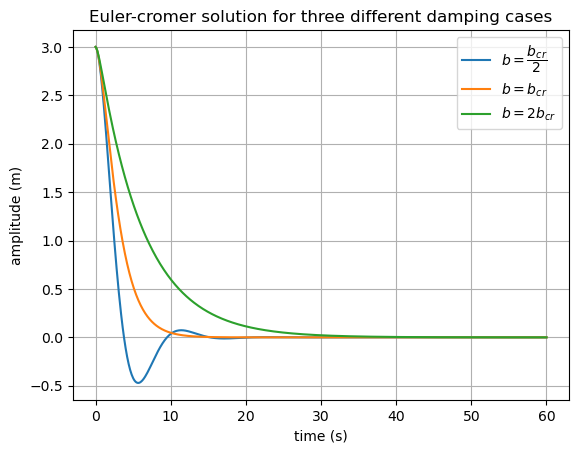

In [18]:
#denoting the critical value
CRIT = np.sqrt(4 * SPRING_K * MASS)
damp = [CRIT * 0.5, CRIT, CRIT*2]
label = ['$b = \dfrac{b_{cr}}{2}$', '$b = b_{cr}$', '$b = 2b_{cr}$']
fig = plt.figure()
for index, value in enumerate(damp):
    time, Euler_crom_sol = Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX, b = value)[0:2]
    plt.plot(time, Euler_crom_sol, label = label[index])
    plt.grid()
    plt.xlabel('time (s)')
    plt.ylabel('amplitude (m)')
    plt.title('Euler-cromer solution for three different damping cases')
    plt.legend()
plt.show()


In the graph, the blue line corresponds to the underdamped oscillator ($\dfrac{b_{cr}}{2}$), yellow corresponds to the critical damped oscillator and green line corresponds to the overdamped oscillator. The numerical solutions matched what we expected for the motion under these situations. For the underdamped case, the amplitude is observed to oscillate once before it completely rests.  As for the yellow line, the amplitude exponentially decays quickly until it reaches zero at around 15 s. This is reasonable since critically damped case is when the oscillator reaches to rest in the short amount of time without oscillating. As for the green line, the exponential decay of the amplitude is much longer than the yellow line.

# Week 3 tasks: Investigating the presence of an external force

We now investigate the numerical simulation of an oscillator under the presence of external force. Two types of forces are considered. One is the the sudden push of an oscillator at a certain point, the other being an externally drived sinusoidal force with different frequency. For these cases, the force $F(t)$ now needs to be considered in the differential equation, so the code for the numerical method (Euler-Cromer) is modified to include for this feature.

## Sudden push

In the case of the sudden push, $F(t)$ is in the form of a dirac delta where it happens instantaneously. We can approximate this with a gaussian model where the standard deviation acts as the impact time and constant in front is the peak force of the push.<br>
$F(t) = \dfrac{F_0}{\sqrt{2\pi\sigma^2}}\exp{\dfrac{(x-x_0)^2}{2\sigma^2}}$

In [19]:
# set the values of force, time of peak and duration 
force = 50
peak_time = 15
impact_duration = 0.1

# model of a sudden push is a gaussian with a small impact time
def sudden_force(t, peak_time, impact_time, max_force):
    '''
    create a array of forces at different time based on the user's input of time of peak impact and duration of impact
    
    Parameters:
    t: np.array of time
    peak_time: float
    impact_time: float
    max_force: float
    
    returns
    =======
    force_array : np.ndarray (array of force values)
    '''
    argument = -(t - peak_time)**2/(2*impact_time**2)
    normaliz_constant = 1/(impact_time * np.sqrt(2*np.pi))
    force_array = max_force * normaliz_constant * np.exp(argument)
    return force_array



In [20]:
# set up an array of time with TIME_MAX as end of period of time
time = np.linspace(0, TIME_MAX, num = int(TIME_MAX/TIME_STEP))
push_data = sudden_force(time, peak_time, impact_duration, force)

In [21]:
#updating the original euler cromer solution code with force as new argument
def modified_Euler_cromer_sol(x_0, v_0, time_step, time_max, force, b = DAMP_COEF):
    '''
    new version of Euler-Cromer integration with force input
    same parameters as Euler_cromer_sol
    force: np.ndarray 
    
    Return
    ======
    time: np.ndarray
    solution: np.ndarray
    velocity: np.ndarray
    '''
    solution = np.array([x_0])
    velocity = np.array([v_0])
    time = np.array([0])
    index = 0
    
    while time[-1] < time_max:
        if force[index] !=0:
            a_i = -SPRING_K * solution[-1]/ MASS - b * velocity[-1] / MASS - force[index] / MASS
        else:    
            a_i = - SPRING_K * solution[-1]/ MASS - b * velocity[-1] /MASS
            
        v_i = velocity[-1] + a_i * time_step
        x_i = solution[-1] + v_i * time_step

        solution = np.append(solution, x_i)
        velocity = np.append(velocity, v_i)
        
        time = np.append(time, time[-1] + time_step) 
        index +=1
    
    else:
        return time, solution, velocity

time, push_solution = modified_Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX, push_data)[:2]
eulcrom_time, Euler_crom_sol = Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX)[:2]

b is chosen such that oscillation is underdamped. The numerical integration of the oscillator with the push is plotted and compared with that of an unpushed one.

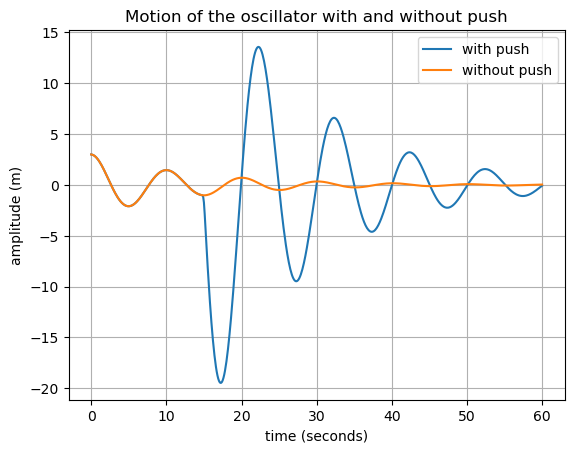

In [22]:
fig = plt.figure()
plt.plot(time, push_solution, label = 'with push')
plt.plot(time, Euler_crom_sol, label = 'without push')
plt.title('Motion of the oscillator with and without push')
plt.xlabel('time (seconds)')
plt.ylabel('amplitude (m)')
plt.legend()
plt.grid()
plt.show()

A large spike is observed in the amplitude of the oscillator after push is acted at t = 15s. This shows that the external push increases the position reached by our oscillator as well as its energy. After a while, the amplitude of the oscillator resumes decaying. This is due to the damping conditions remain unchanged after the push. Note how the last two peaks of the plot with push is similiar to the first two peaks of orange plot (without push). The push of the motion is then tested at different points of the cycle.

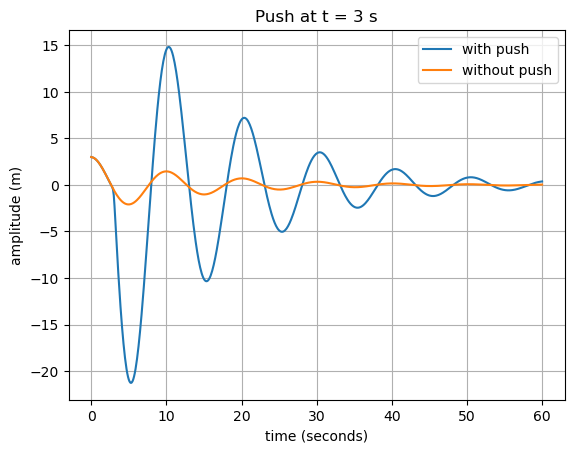

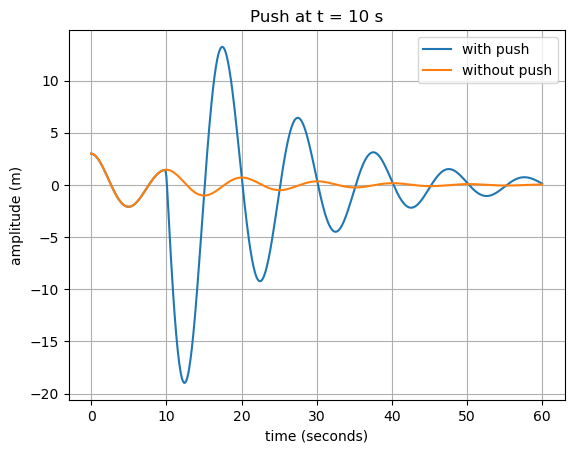

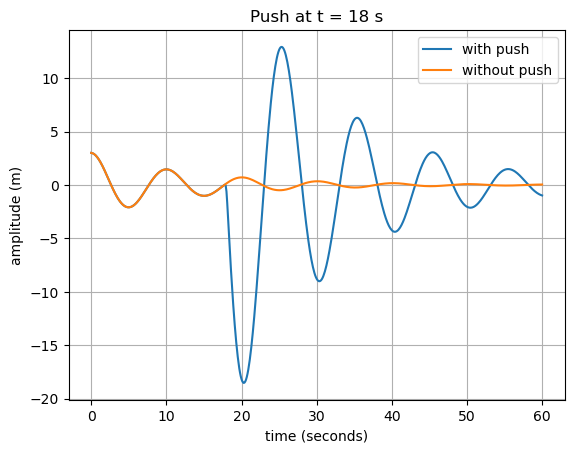

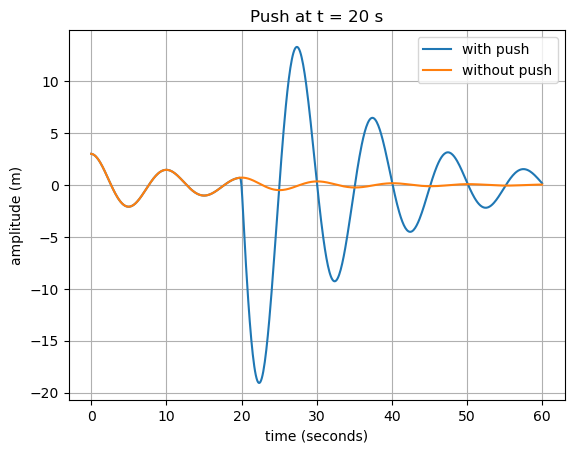

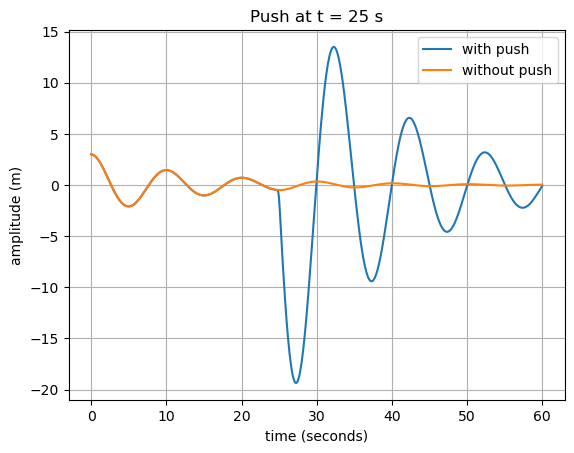

In [23]:
cycle_points = [3, 10, 18, 20, 25]
for peak_time in cycle_points:
    t = np.linspace(0, TIME_MAX, num = int(TIME_MAX/TIME_STEP))
    push_data = sudden_force(t, peak_time, impact_duration, force)
    time, push_solution = modified_Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX, push_data)[:2]
    eulcrom_time, Euler_crom_sol = Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX)[:2]
    fig = plt.figure()
    plt.plot(time, push_solution, label = 'with push')
    plt.plot(time, Euler_crom_sol, label = 'without push')
    plt.title(f'Push at t = {peak_time} s')
    plt.xlabel('time (seconds)')
    plt.ylabel('amplitude (m)')
    plt.legend()
    plt.grid()
    plt.show()

It is interesting to notice that the change in shape of the graph after push is more or less the same shape for different time points,  but it translates from left to right as we start the push at later time-points. This suggests that the transient period to the new peak is independent of the point of time the push is eancted. This is prominent when the push imparted on the motion is large.

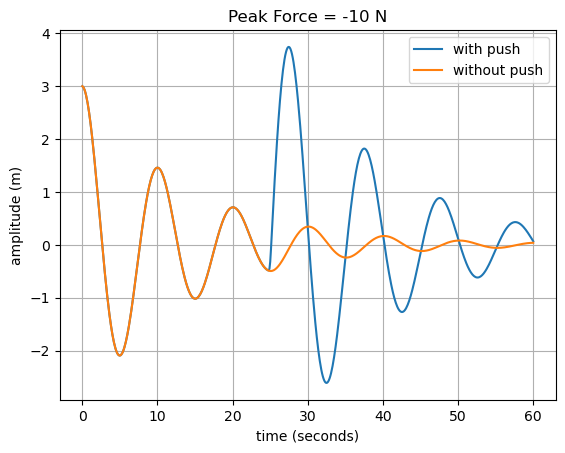

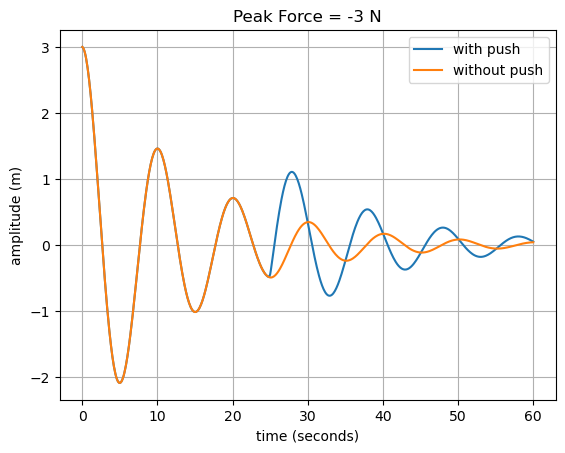

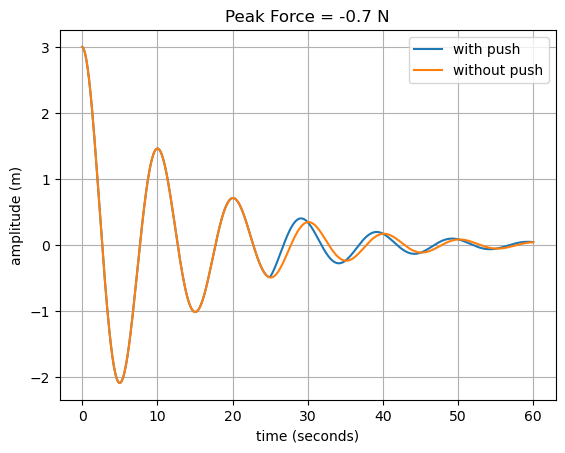

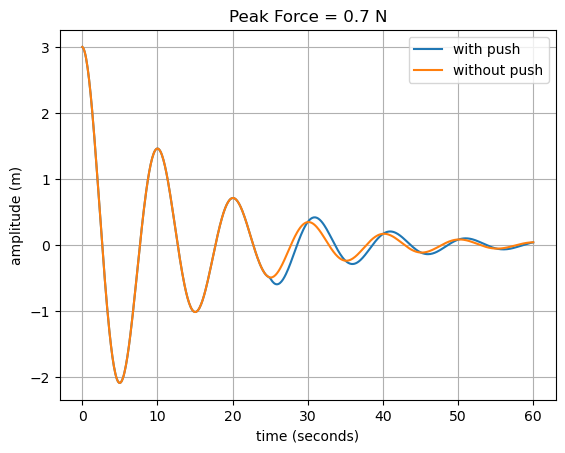

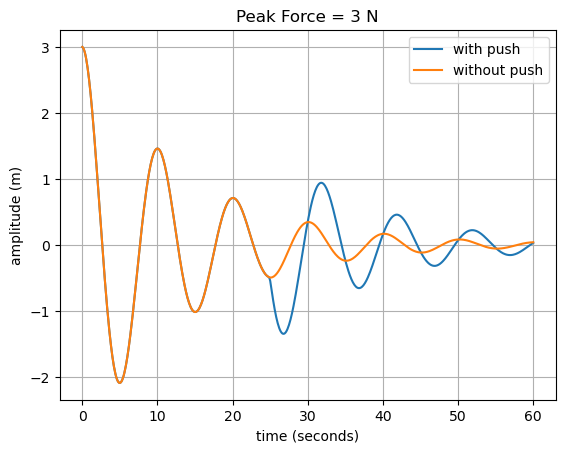

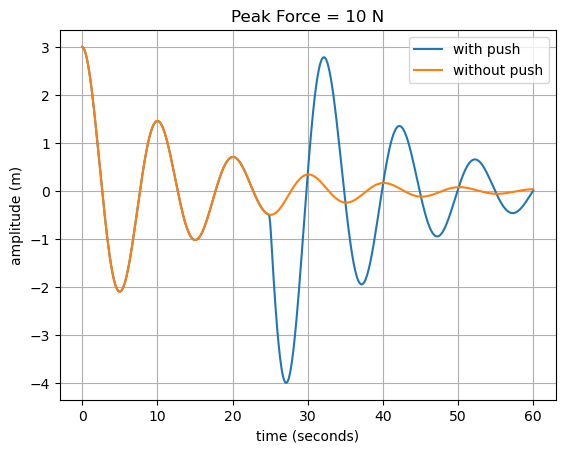

In [24]:
forces  = [-10, -3, -0.7, 0.7, 3, 10]
for force in forces:
    push_data = sudden_force(t, peak_time, impact_duration, force)
    time, push_solution = modified_Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX, push_data)[:2]
    eulcrom_time, Euler_crom_sol = Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX)[:2]
    fig = plt.figure()
    plt.plot(time, push_solution, label = 'with push')
    plt.plot(time, Euler_crom_sol, label = 'without push')
    #plt.scatter(peak_time, )
    plt.title(f'Peak Force = {force} N')
    plt.xlabel('time (seconds)')
    plt.ylabel('amplitude (m)')
    plt.legend()
    plt.grid()
    plt.show()

In the above graphs, the magnitude and sign of the force was varied. By reversing the sign of force on impact, we reverse the motion of the oscillation and increase its amplitude in the opposite direction. Moreover, when the size of the force is comparable to amplitude, it doesn't increase it that much but shifts a delay in its motion. It is also apparent that as the magnitude of the force is larger, the subsequent time of damping till rest is longer.

## Sinusoidal force drive on oscillator

Sinusoidal force drive occurs when a force with a certain frequency is applied to a normal damped oscillator. This induces a transient response in the oscillator's motion where it transitions into a steady state oscillation. If the frequency of the force is comparable to the natural frequency $\omega_0$, the oscillator will eventually oscillate at the same frequency as the force. 

In [25]:
def sinusoidal_force(max_force, orb_frequency, time):
    '''
    creating a force array where forces is based on a sinusoial model over time
    '''
    return max_force * np.sin(orb_frequency * time)

# omega is orbital frequency of motion
omega = 5 * SPRING_K / MASS 
drive_force = sinusoidal_force(force, omega, time)
time, push_solution = modified_Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX, drive_force)[:2]



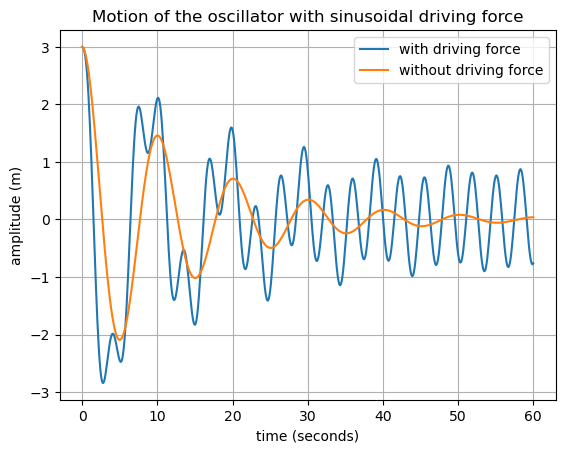

In [26]:
fig = plt.figure()
plt.plot(time, push_solution, label = 'with driving force')
plt.plot(time, Euler_crom_sol, label = 'without driving force')
plt.title('Motion of the oscillator with sinusoidal driving force')
plt.xlabel('time (seconds)')
plt.ylabel('amplitude (m)')
plt.legend()
plt.grid()
plt.show()

Frequency of driving force is 5 * natural frequency. We can see the amplitude of the oscillator gradually decreases until it becomes stable on a certain value. This is the transient period. Beating is observed as seen from the alternate high and low amplitudes. This is because of interference with the force's frequency and motion of the oscillator. Until the previous motion decays entirely, the oscillator vibrates with the force's frequencies. Oscillations reached a higher amplitude and frequency is observed to be five times higher than before (as what we inputted for the force frequency). 


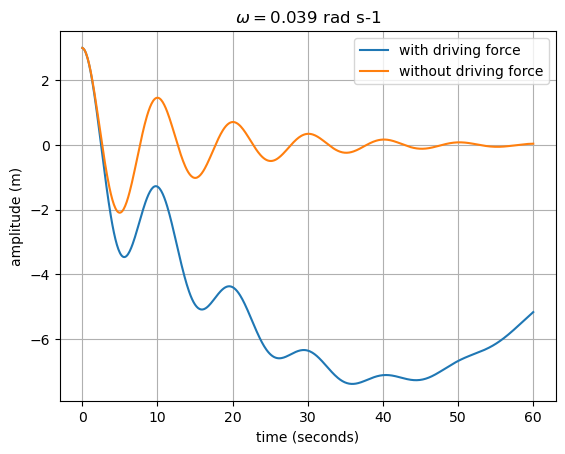

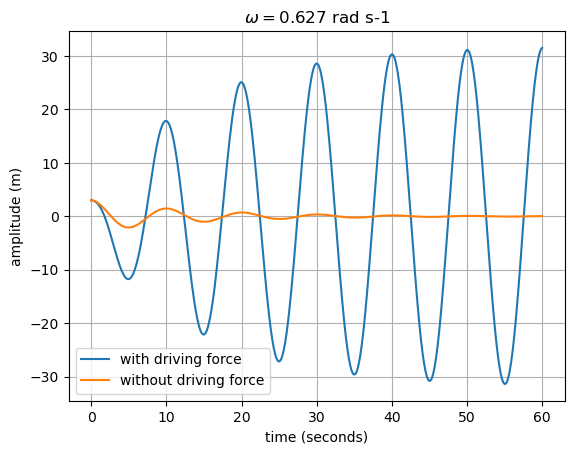

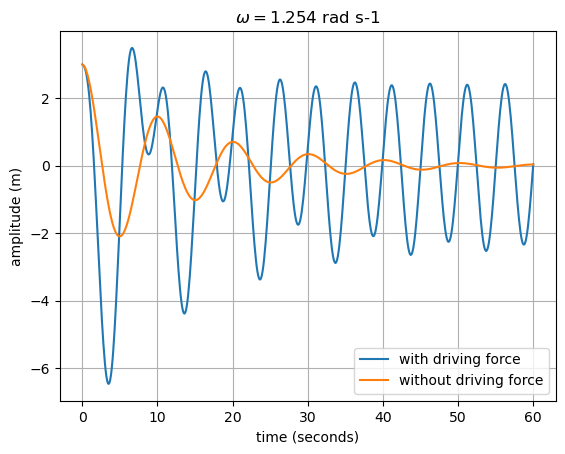

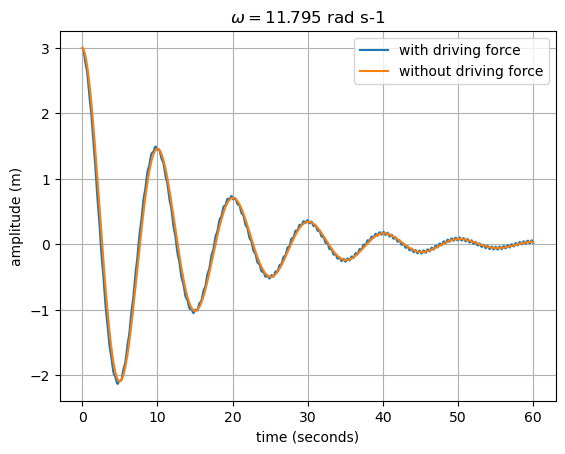

In [27]:
frequencies = [0.1 * SPRING_K/ MASS, np.sqrt(SPRING_K/MASS), np.sqrt(SPRING_K/ MASS) * 2, SPRING_K * 30 / MASS ]
for omega in frequencies:
    drive_force = sinusoidal_force(force, omega, time)
    time, push_solution = modified_Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX, drive_force)[:2]
    fig = plt.figure()
    plt.plot(time, push_solution, label = 'with driving force')
    plt.plot(time, Euler_crom_sol, label = 'without driving force')
    plt.title(r'$\omega = {0:4.3f}$ rad s-1'.format(omega))
    plt.xlabel('time (seconds)')
    plt.ylabel('amplitude (m)')
    plt.legend()
    plt.grid()
    plt.show()

Here a span of frequencies with different magnitudes are tested with the code to observe the simulation of the oscillator under a driving force. For the top case (with a very small driving frequency value), it is noted that the plot with driving force severly deviates away from that without the driving force. Amplitude reaches to a more negative position than its original oscillation. This suggests a lack of synchronisation between the force and the motion due to the driving frequency being very small. As a result, the oscillator damps a lot faster, until its amplitude is low to the point where it gains energy from the driving force of the pendulum. The transient period is also longer compared to other oscillations. 

The second case is known as resonance, where the driving frequency is the same as the natural frequency ($\omega = 0.627$). The amplitude of oscillator gains a significant increase , which aligns what we expected for a resonant behaviour. As we increase the frequency slightly away just like in the third graph, the response in amplitude weakens but still keeps the pendulum in a steady state. Beating can again be seen in the transient period.

As for the final case where magnitude of driving frequency is lot higher, there is no huge differences between the two plots, aside from very small bumps seen on the graph. This is likely because the driving force is applied at a high pace which has no major effect in its amplitude at a large timescale. Hence, the oscillator still overall decays. That does not mean it has no effect as evident by the small bump, but the boost in amplitude will not be high.

# Using Q Factor to study the resonant behaviour

We can turn to a more quantitative analysis on the resonance effects by the driving frequency by studying its Q factor.This is done by plotting a graph of amplitude against the driving frequency. In theory, a lorentzian graph with a peak at the resonant frequency $f_0$ with a width $\Delta f$ will be obtained. By computing $\dfrac{f_0}{\Delta f}$, we can get the quality factor Q.<br> 
The Q factor is the ratio of initial energy stored in the oscillator to the energy lost in one radian of the cycle. The larger the value $Q$, the better the oscillator it is.

In [28]:
def resonant_amplitude(frequency, solution):
    '''
    Grabs the max amplitude of resonant behaviour during the oscillator's steady state oscillation
    '''
    period = 2 * np.pi / frequency
    select_range = - int(period/ TIME_STEP)
    # selecting range of data corresponding to period by slicing
    solution_range = solution[select_range:]
    return np.max(solution_range)

natural_f = np.sqrt(SPRING_K/MASS)

In [29]:
def resonant_data(drive_frequency, force, damping):
    '''
    collects data for the peak resonant amplitude values for different driving frequencies
    
    Parameters
    ==========
    drive_frequency: np.ndarray (range of driving frequencies)
    force: peak magnitude of the sinusoidal force
    
    Returns
    =======
    amplitudes: np.ndarray (peak amplitudes of the resonance)
    '''
    amplitudes = np.array([])
    # pick a large time point such as 100s so that the oscillator will be in its steady state oscillations
    steady_time_range = 100
    time = np.linspace(0, steady_time_range, num = int(steady_time_range/TIME_STEP))
    for omega in drive_frequency:
        drive_force = sinusoidal_force(force, omega, time)
        solution = modified_Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX, drive_force, b = damping)[1]
        amplitude = resonant_amplitude(omega, solution)
        amplitudes= np.append(amplitudes, amplitude)
    return amplitudes

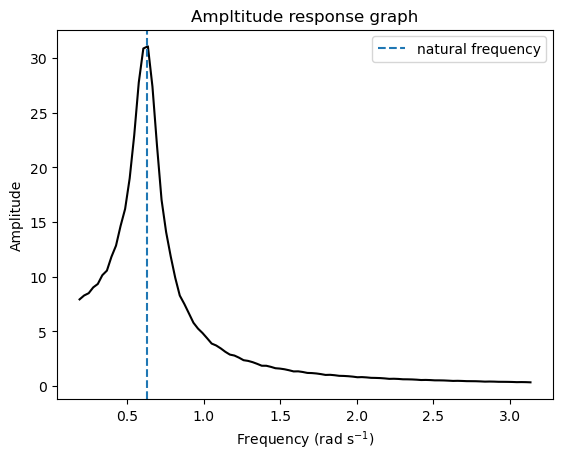

In [30]:
# set an array of different values of driving frequency
drive_frequency = np.linspace(0.3 * natural_f, 5*natural_f, num = 100)

amplitudes = resonant_data(drive_frequency, force, DAMP_COEF)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(drive_frequency, amplitudes, color = 'black')
ax.axvline(natural_f, linestyle = '--', label = 'natural frequency')
ax.set_xlabel('Frequency (rad s$^{-1}$)')
ax.set_ylabel('Amplitude')
ax.set_title('Ampltitude response graph')
ax.legend()
plt.show()

As we expected, the graph is shown to peak right at its natural frequency, where the amplitude sharply drops as the driving frequency deviates away from it. The curve has a width at its half maximum, which can be obtained by code.

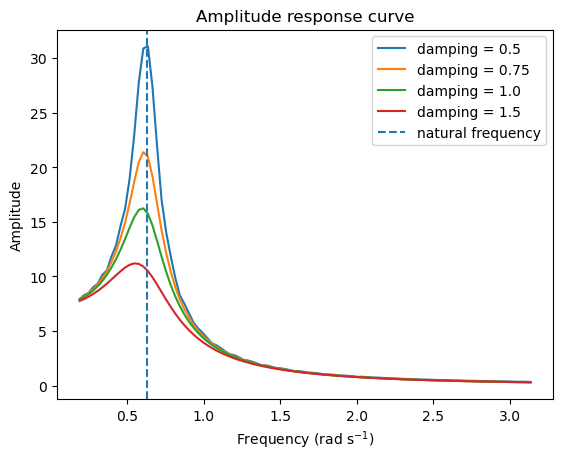

In [31]:
# plotting different resonance with different damping
b = [DAMP_COEF, 1.5 * DAMP_COEF, 2 * DAMP_COEF, 3 * DAMP_COEF]

fig = plt.figure()
ax = fig.add_subplot(111)
#create empty array called 'data' to collect amplitude data for different dampings
data = []
for damping in b:
    amplitudes = resonant_data(drive_frequency, force, damping)
    #append amplitudes to data after it is computed for each damping
    data.append(amplitudes)
    ax.plot(drive_frequency, amplitudes, label = f'damping = {damping}')
ax.axvline(natural_f, linestyle = '--', label = 'natural frequency')
ax.set_xlabel('Frequency (rad s$^{-1}$)')
ax.set_ylabel('Amplitude')
ax.set_title('Amplitude response curve')
ax.legend()
plt.show()

Different damping is varied to assess the changes in the resonance plot. From the above plot, two major observations can be seen. Firstly, the peak of the curve decreases as damping increases. This is in line with the theory, as more energy is lost to larger damping as the pendulum oscillates. This lowers the maximum amplitude the oscillator can reach. The second observation is that the resonant frequency deviates away from the natural frequency as damping increases. 

# calculating Q Factor
The Q factor is obtained by applying a lorentzian fit to the resonance curve where energy is plotted against frequency. Because $E \propto A^2$, the amplitude squared was plotted against frequency. A fit was then applied on each graph to obtain values of $f_0$, $\Delta f$, where the Q factor was then computed.

0.6229682033550161
Natural frequency is 0.6270
Frequency is 0.6161 +/- 0.0008
width is 0.150 +/- 0.002
Q factor is 4.11 +/- 0.06


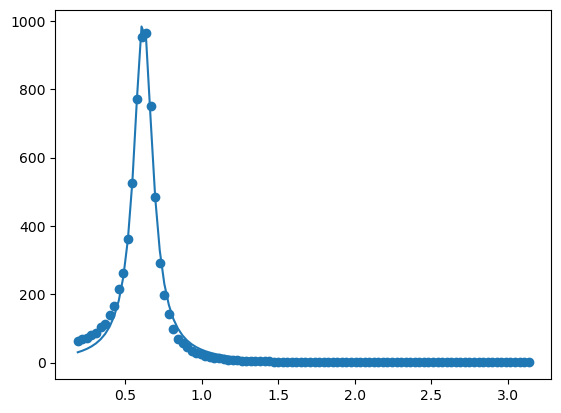

Frequency is 0.6009 +/- 0.0016
width is 0.227 +/- 0.005
Q factor is 2.65 +/- 0.05


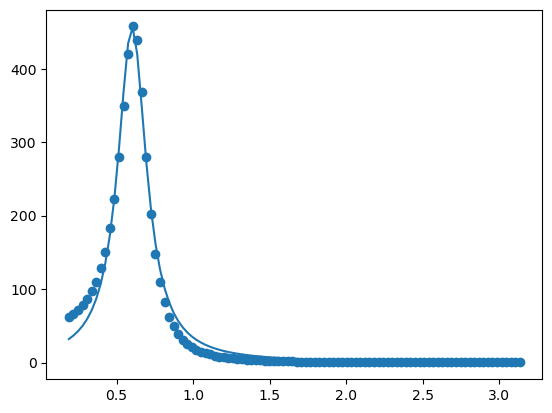

Frequency is 0.5786 +/- 0.0025
width is 0.307 +/- 0.007
Q factor is 1.88 +/- 0.05


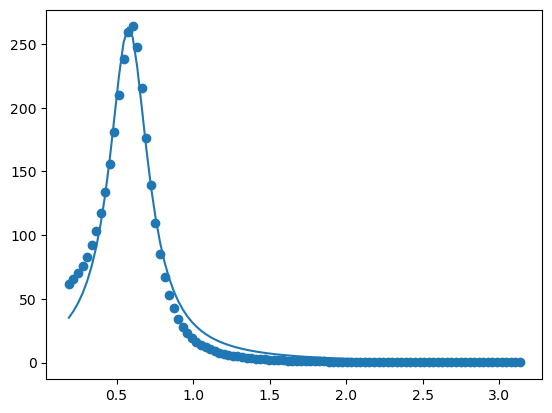

Frequency is 0.5156 +/- 0.0040
width is 0.455 +/- 0.012
Q factor is 1.13 +/- 0.03


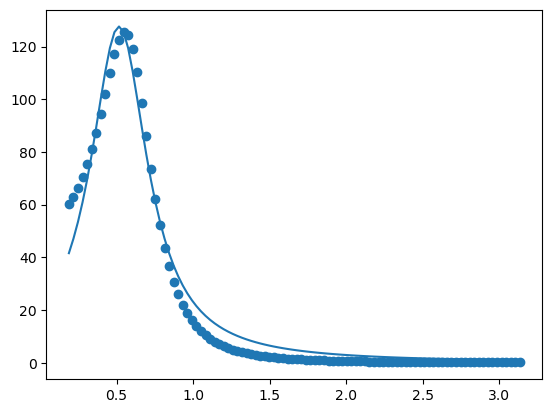

In [32]:
# creating the fit function for lorentzian using scipy.curve_fit
from scipy.optimize import curve_fit

def lorentzian_func(x, A, x_0, width):
    '''
    expression for lorentzian.
    (x_0 - position of the peak
    width - width of the peak at half-maximum)
    
    returns:
    popt: optimized parameters that give the best fit
    '''
    x_term = (x-x_0)**2
    width_term = width**2/4
    return A * width /(x_term + width_term)

def fitting_sort(popt, pcov):
    '''
    sorts out data from the fit and returns the resonant frequency, width with their errors as well 
    
    Parameters
    ==========
    popt: np.ndarray (optimized parameters return by curve-fit function)
    pcov: np.ndarray (covariance matrix return by curve-fit function)
    '''
    f_0, width = popt[1:]
    f_error = np.sqrt(pcov[1,1])
    width_error = np.sqrt(pcov[2,2])
    return f_0, width, f_error, width_error

def q_factor_analysis(f_0, width, f_error, width_error):
    '''
    calculates the q factor for the data and associated error for the q-factor
    
    Parameters
    ===========
    f_0: float (resonant frequency)
    width: float (width of lorentzian)
    f_error: float (fit error for f_0)
    width_error: float (fit error for width)
    
    returns
    ========
    q_factor: float 
    q_error: float
    '''
    q_factor = f_0/width
    error1 = np.sqrt(f_error)
    error2 = np.sqrt(width_error)
    q_error = q_factor * np.sqrt((f_error/f_0)**2 + (width_error/width)**2)
    return q_factor, q_error


# create empty array for q factors
q_list = []
error_list = []

print(np.sqrt(SPRING_K/MASS - (DAMP_COEF/2/MASS)**2))
print('Natural frequency is {0:5.4f}'.format(natural_f))
for amplitude_data in data:
    amplitude_sq = amplitude_data ** 2
    popt, pcov = curve_fit(lorentzian_func, drive_frequency, amplitude_sq)
    f_0, width, f_error, width_error = fitting_sort(popt, pcov)
    fitted_data = lorentzian_func(drive_frequency, *popt)
    
    # divide frequency over width to get q factor
    q_factor, q_error = q_factor_analysis(f_0, width, f_error, width_error)
    print('Frequency is {0:5.4f} +/- {1:5.4f}'.format(f_0, f_error))
    print('width is {0:4.3f} +/- {1:4.3f}'.format(width, width_error))
    print('Q factor is {0:3.2f} +/- {1:3.2f}'.format(q_factor, q_error))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(drive_frequency, amplitude_sq)
    ax.plot(drive_frequency, fitted_data) 
    plt.show()
    
    q_list.append(q_factor)
    error_list.append(q_error)



We know in theory, that the quality factor $Q = \dfrac{\omega_{0}}{\gamma} = \dfrac{\omega_{0}m}{b}$ and since $\omega_{0}$ is fixed, it will vary proportionally to $\dfrac{1}{\gamma}$. A fit can thus be performed on the collected data.

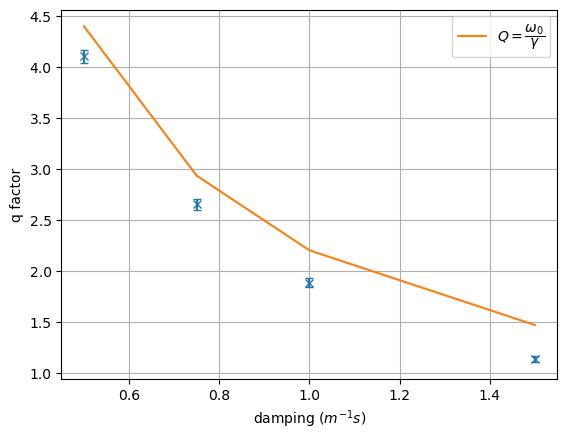

In [33]:
def q_ratio(w_0, b):
    '''
    calculates the quality factor by ratio of natural frequency over b
    '''
    gamma = b/ MASS
    return w_0/gamma

b = np.array(b)
anal_q = q_ratio(natural_f, b)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(b, q_list, yerr = error_list, fmt = 'x', capsize = 3)
ax.plot(b, anal_q, label = '$Q = \dfrac{\omega_{0}}{\gamma}$')
ax.set_xlabel('damping ($m^{-1} s$)')
ax.set_ylabel('q factor')
ax.grid()
ax.legend()
plt.show()

In summary of the fit values we have collected, we can indeed see the quality factor $Q$ has an inverse relationship with the damping coefficient $b$. The Q-factor is an indicator of how well-sustained the oscillation is, so the more loss introduced by higher damping, the less energy an oscillator will have and the lower the Q-factor is. This is reasonable with the theory.

However, when we try fitting the analytical solution, it is clear the data has a huge offset in comparison to the analytical formula. The offset exceeded the uncertainty range produced by our fit-error. The error did not seem to originate with our fit since the graph does appear to fit nicely. One conclusion we can draw is likely the analytical formula is not entirely accurate. In theory, $Q = \dfrac{\omega_{0}}{\gamma}$ only works well as an approximation if $\gamma << \omega_0$. In addition, the resonant frequency is shown to shift away from the natural frequency which induces significant error in the Q factor formula. larger deviation are thus observed with higher damping as evident by our graph. This is however not conclusive enough with our current graph due to the small number of data points and will be improved if more data points of different damping are collected.

## Testing with a square wave function of force

Additionally, the interaction of an oscillator under a square wave force was also experimented. Square waves have a distinct square shape, where half a period corresponds to one amplitude and the other half corresponds to the same amplitude in opposite sign.

In [34]:
def square_wave(A, omega, time_max, time_step):
    '''
    creates a force array based on a square wave function
    
    Parameters
    ==========
    A: float (amplitude)
    omega: float (orbital frequency)
    time_max: float (final time of the time array)
    time_step: float (time step)
    
    Return
    ======
    square_wave: force array
    '''
    period = 2*np.pi/omega
    square_wave = np.array([])
    # find the no of time steps correspond to half a period and the full period 
    full_step = int(time_max/time_step)
    half_period = period/2
    steps = int(half_period/time_step)
    # split the full-steps into number of steps corresponding to a period and create arrays with positve amplitudes
    # in front, negative in back
    for step in range(0, full_step, 2*steps):
        final_diff = full_step - step
        # First two conditions is checking the final steps and fill in the exact number of amplitudes if their number
        # doesn't correspond to one period
        if steps < final_diff < 2*steps:
            up_period = np.full((1, steps), A)
            down_period = np.full((1, final_diff - steps), -A)
            cycle = np.hstack((up_period, down_period))
        elif final_diff <= steps:
            up_period = np.full((1, final_diff), A)
            cycle = up_period
        else:
            up_period = np.full((1, steps), A)
            down_period = np.full((1,steps), -A)
            cycle = np.hstack((up_period, down_period))
        square_wave = np.append(square_wave, cycle)
    return square_wave 

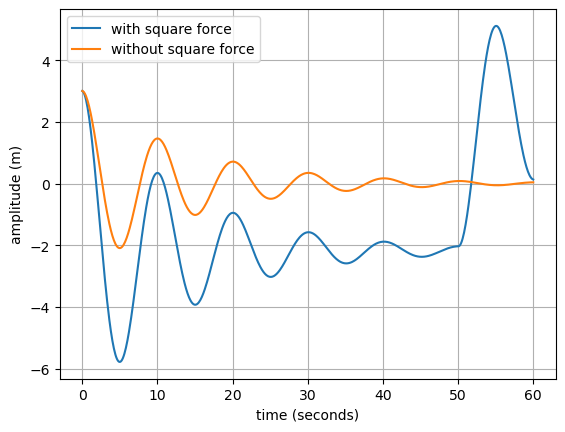

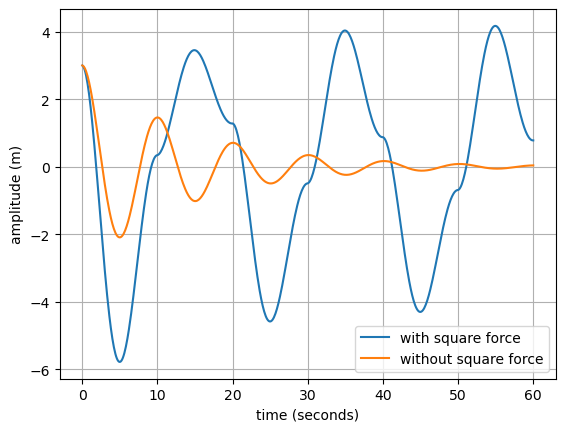

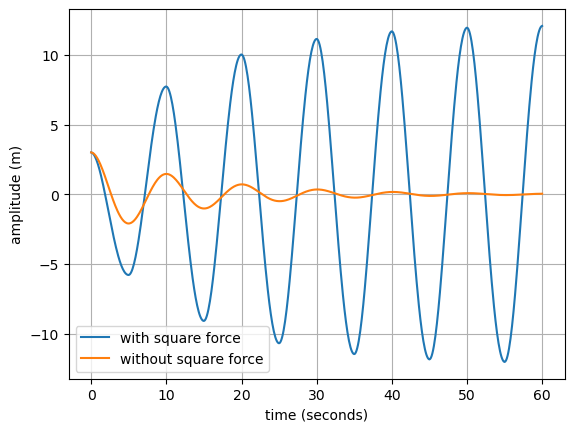

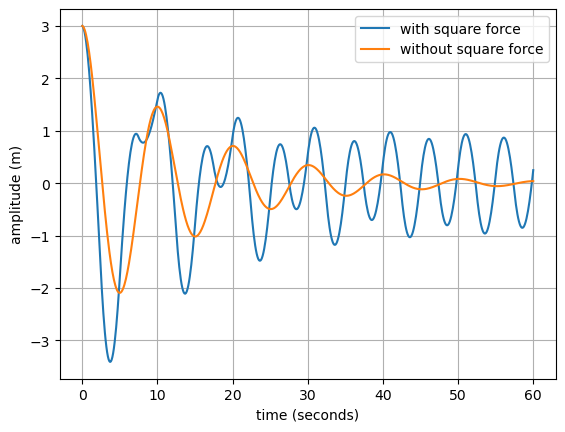

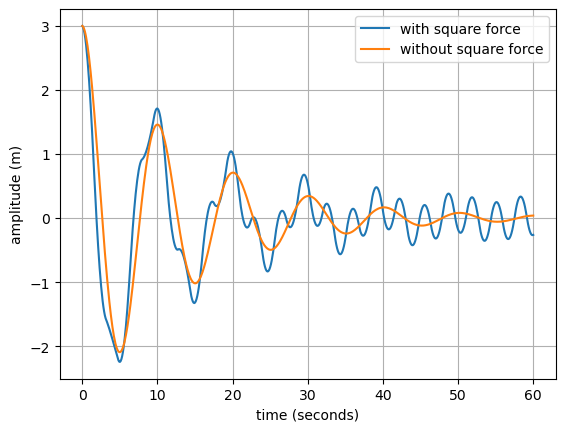

In [35]:
frequencies = [0.1 * natural_f, natural_f * 0.5, natural_f, natural_f * 2, natural_f * 3]
# testing with different frequencies
for omega in frequencies:
    square_force = square_wave(3, omega, TIME_MAX, TIME_STEP)
    time, amplitude = modified_Euler_cromer_sol(initial_x, initial_v, TIME_STEP, TIME_MAX, square_force)[:2]
    fig = plt.figure()
    plt.plot(time, amplitude, label = 'with square force')
    plt.plot(time, Euler_crom_sol, label = 'without square force')
    plt.xlabel('time (seconds)')
    plt.ylabel('amplitude (m)')
    plt.legend()
    plt.grid()
    plt.show()

From our mini-experiment, the cases with resonance and frequencies above natural frequencies don't seem to differ much than the normal sinusoidal force. Beating does occur in the steady state as the driving force wave is slightly interfering with the motion of the object. The cases with smaller frequencies however show interesting results. For the first case, the amplitudes of the damped motion appear to be shifted downwards until it significantly increases again. This may be due to the push from the square wave in the reverse direction. The point in time is around 50s which does correspond to half the period for that frequency (T = 100 s). As for the second case, the pushes by the square wave are in sync with the peaks of the damped motion. This greatly increases the amplitude and creates a distinct shape due to the strong interference.

# Conclusion

In summary, the accuracy of numerical methods can vary to a big degree based on order of step-size in their truncation error. It is concluded from our extensive error analysis that Euler-Cromer is the most accurate numerical method, followed by Verlet method. In addition, we have verified many theories underlying the physics of oscillations using Euler-cromer method, including slight pushes and driving force cases. Results in certain aspects such as the q-factor can be improved if more data was collected. But overall, the results and performance returned by Euler-Cromer method were satisfactory and reliable. 